In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,0
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,1
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,0


# 1

<AxesSubplot:>

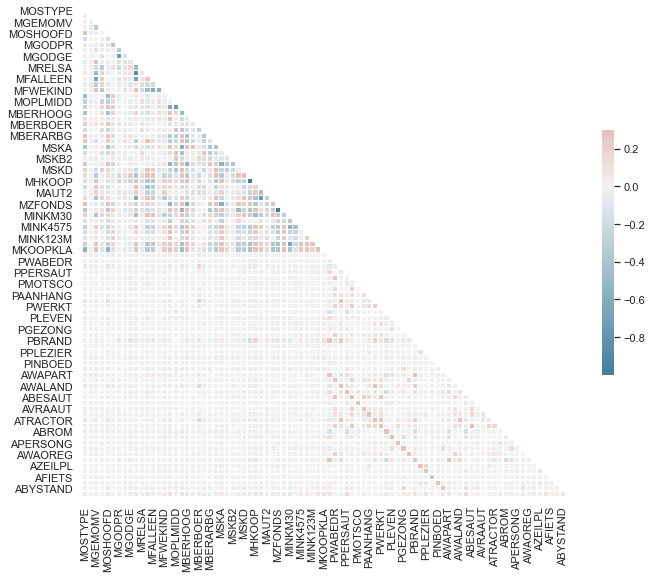

In [140]:
sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
from scipy.stats import pearsonr
corr_dict = {}
for i in train.drop('CARAVAN',axis=1):
    corr_dict[i],_= pearsonr(train[i],train['CARAVAN'])

In [15]:
sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)[:10]

[('PPERSAUT', 0.1509097148244543),
 ('APERSAUT', 0.14421046445219193),
 ('APLEZIER', 0.10569950446603942),
 ('PWAPART', 0.0964626876771548),
 ('MKOOPKLA', 0.09593826270941126),
 ('PBRAND', 0.09444598965501168),
 ('PPLEZIER', 0.09136115886291009),
 ('MINKGEM', 0.0901853819579985),
 ('AWAPART', 0.08938747267886943),
 ('MOPLHOOG', 0.08463533763036604)]

# 2

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop('CARAVAN',axis=1),train['CARAVAN'], test_size=0.2, random_state=0)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
c_values = [i for i in np.arange(0.1,1.1,0.1)]
f1_dict = {}
for i in c_values:
    log_reg = LogisticRegression(penalty='l1', solver='liblinear',C=i).fit(X_train,y_train)
    pred = log_reg.predict(X_val)
    f1_dict[i] = accuracy_score(y_val,pred)

In [28]:
f1_dict

{0.1: 0.9330472103004291,
 0.2: 0.934763948497854,
 0.30000000000000004: 0.934763948497854,
 0.4: 0.9339055793991416,
 0.5: 0.9339055793991416,
 0.6: 0.9330472103004291,
 0.7000000000000001: 0.9330472103004291,
 0.8: 0.9330472103004291,
 0.9: 0.9330472103004291,
 1.0: 0.9330472103004291}

In [49]:
test = pd.read_csv('test.csv')
X_test,y_test = test.drop('CARAVAN',axis=1),test['CARAVAN']

In [50]:
log_reg = LogisticRegression(penalty='l1', solver='liblinear',C=0.2).fit(train.drop('CARAVAN',axis=1),train['CARAVAN'])
pred = log_reg.predict(X_test)
accuracy_score(y_test,pred)

0.94075

In [36]:
asd = {name:coef for name,coef in zip(train.drop('CARAVAN',axis=1).columns,log_reg.coef_[0])}

In [52]:
asd

{'MOSTYPE': 0.0564802088105749,
 'MAANTHUI': 0.00021609308387074506,
 'MGEMOMV': 0.00034664932204265435,
 'MGEMLEEF': 0.016661692010763063,
 'MOSHOOFD': 0.019175707316190956,
 'MGODRK': 0.0008319583729023698,
 'MGODPR': 0.01758234547496643,
 'MGODOV': 0.019820205122190196,
 'MGODGE': 0.01781956511775019,
 'MRELGE': 0.010710923040088248,
 'MRELSA': 0.000554638915268246,
 'MRELOV': 0.009976774047953052,
 'MFALLEEN': 0.007331745866428238,
 'MFGEKIND': 0.0216581990009577,
 'MFWEKIND': 0.0095198331558899,
 'MOPLHOOG': 0.01048949475180869,
 'MOPLMIDD': 0.026821404506852126,
 'MOPLLAAG': 0.022120914595132737,
 'MBERHOOG': 0.014386632674514802,
 'MBERZELF': 0.0185630145183476,
 'MBERBOER': 0.005231253405370963,
 'MBERMIDD': 0.00314250059612731,
 'MBERARBG': 0.018081270111550553,
 'MBERARBO': 0.02386040817461936,
 'MSKA': 0.016987327060985408,
 'MSKB1': 0.01494232541330026,
 'MSKB2': 0.013742317581760616,
 'MSKC': 0.028865049065997767,
 'MSKD': 0.007450070437135556,
 'MHHUUR': 0.009183226368566

### As we can see from above most of the variables we thought were important from our initial analysis are not the same in the Logistic Regression Model. We achieved an accuracy of 94% on the test data
### The top 5 features for Logistic Regression are 'MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD'

# 3

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
#trainpoly = poly.fit_transform(train.drop('CARAVAN',axis=1))
total = pd.concat([train,test],axis=0)
totalpoly = poly.fit_transform(total.drop('CARAVAN',axis=1))

train_poly = totalpoly[:5822]
test_poly = totalpoly[5822:]
#X_trainpoly, X_valpoly, y_trainpoly, y_valpoly = train_test_split(trainpoly,train['CARAVAN'], test_size=0.2, random_state=0)

log_reg = LogisticRegression(penalty='l1', solver='liblinear',C=0.2).fit(train_poly,total['CARAVAN'].iloc[:5822])
pred = log_reg.predict(test_poly)
accuracy_score(test['CARAVAN'],pred)

0.92525

In [60]:
len(train_poly)

5823

In [61]:
9822-5823

3999

### The accuracy without polynomial features was 94% but after introducing polynomial features the accuracy dropped to 92.5%. For this cas the original model performed better than the polynomial model.

# 4

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(train.drop('CARAVAN',axis=1),train['CARAVAN'])
pred = dt.predict(test.drop('CARAVAN'),axis=1)
accuracy_score(test[['CARAVAN']],pred)

0.8875536480686695

In [46]:
asd = {name:coef for name,coef in zip(train.drop('CARAVAN',axis=1).columns,dt.feature_importances_)}

In [47]:
asd

{'MOSTYPE': 0.0564802088105749,
 'MAANTHUI': 0.00021609308387074506,
 'MGEMOMV': 0.00034664932204265435,
 'MGEMLEEF': 0.016661692010763063,
 'MOSHOOFD': 0.019175707316190956,
 'MGODRK': 0.0008319583729023698,
 'MGODPR': 0.01758234547496643,
 'MGODOV': 0.019820205122190196,
 'MGODGE': 0.01781956511775019,
 'MRELGE': 0.010710923040088248,
 'MRELSA': 0.000554638915268246,
 'MRELOV': 0.009976774047953052,
 'MFALLEEN': 0.007331745866428238,
 'MFGEKIND': 0.0216581990009577,
 'MFWEKIND': 0.0095198331558899,
 'MOPLHOOG': 0.01048949475180869,
 'MOPLMIDD': 0.026821404506852126,
 'MOPLLAAG': 0.022120914595132737,
 'MBERHOOG': 0.014386632674514802,
 'MBERZELF': 0.0185630145183476,
 'MBERBOER': 0.005231253405370963,
 'MBERMIDD': 0.00314250059612731,
 'MBERARBG': 0.018081270111550553,
 'MBERARBO': 0.02386040817461936,
 'MSKA': 0.016987327060985408,
 'MSKB1': 0.01494232541330026,
 'MSKB2': 0.013742317581760616,
 'MSKC': 0.028865049065997767,
 'MSKD': 0.007450070437135556,
 'MHHUUR': 0.009183226368566

### Here we can see that the features which were important in Q1 are not the same, but the features we acquired in Logistic regression are similar to that of with Decision tree. As the top 5 features for decision tree are 'MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD'

### The accuracy did not increase for the decision tree classifier

### The best model was the original model with 93% accuracy whereas logReg with polynomial features scores 90% and the least performing model was DecisionTree with an accuracy of only 88%